In [ ]:
!pip install tensorflow==2.0.0-alpha0

     |████████████████████████████████| 79.9MB 47kB/s 
     |████████████████████████████████| 3.0MB 38.9MB/s 
     |████████████████████████████████| 419kB 40.3MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/"

'image recognition.ipynb'   Supernova.ipynb   train.zip
 ImageRec.zip		    train1.zip


In [ ]:
train_file = "/content/drive/My Drive/Colab Notebooks/ImageRec.zip"

In [ ]:
import zipfile

with zipfile.ZipFile(train_file, 'r') as z:
    z.extractall()

In [ ]:
import os
train_path = './ImageRec/'
image_files = os.listdir(train_path)
image_files

['BlackHole_03.jpeg',
 'BlackHole_06.jpg',
 'BlackHole_12.jpg',
 'Supernova_02.jpeg',
 'Supernova_05.jpeg',
 'Supernova_30.jpg',
 'BlackHole_10.jpeg',
 'BlackHole_07.jpg',
 'BlackHole_27.jpg',
 'BlackHole_04.jpg',
 'Supernova_27.jpg',
 'Supernova_07.jpeg',
 'BlackHole_03.jpg',
 'Supernova.jpg',
 'Supernova.jpeg',
 'Supernova_07.jpg',
 'BlackHole_17.jpg',
 'BlackHole_29.jpg',
 'BlackHole_02.jpg',
 'Supernova_22.jpg',
 'BlackHole_25.jpg',
 'Supernova_25.jpg',
 'Supernova_19.jpg',
 'BlackHole_07.jpeg',
 'BlackHole_13.jpg',
 'Supernova_03.jpg',
 'Supernova_32.jpg',
 'Supernova_26.jpg',
 'BlackHole_09.jpeg',
 'BlackHole_15.jpg',
 'BlackHole.jpeg',
 'BlackHole_18.jpg',
 'BlackHole_20.jpg',
 'Supernova_04.jpg',
 'BlackHole_21.jpg',
 'BlackHole_09.jpg',
 'BlackHole_11.jpeg',
 'Supernova_05.jpg',
 'Supernova_02.jpg',
 'BlackHole_14.jpg',
 'Supernova_12.jpg',
 'BlackHole_10.jpg',
 'BlackHole_06.jpeg',
 'BlackHole_04.jpeg',
 'BlackHole_26.jpg',
 'Supernova_17.jpg',
 'Supernova_10.jpg',
 'Supernov

In [ ]:
import os
import cv2

def load_image(file_path):
    return cv2.imread(file_path)

def extract_label(file_name):
    return 1 if "Supernova" in file_name else 0

train_path = "./ImageRec/"
image_files = os.listdir(train_path)
train_images = [load_image(train_path + file) for file in image_files]
train_labels = [extract_label(file) for file in image_files]
for i in image_files:
  print(train_images,'Whose label is: ',train_labels)

Streaming output truncated to the last 5000 lines.
       [[56, 44, 42],
        [56, 44, 42],
        [55, 43, 41],
        ...,
        [57, 39, 38],
        [57, 39, 38],
        [57, 39, 38]]], dtype=uint8), array([[[ 59,  18,  39],
        [ 54,  11,  32],
        [ 52,   4,  28],
        ...,
        [ 55,  17,  45],
        [ 55,  17,  45],
        [ 55,  17,  45]],

       [[ 67,  23,  46],
        [ 61,  15,  38],
        [ 58,   8,  32],
        ...,
        [ 56,  18,  46],
        [ 56,  18,  46],
        [ 56,  18,  46]],

       [[ 74,  27,  53],
        [ 67,  19,  45],
        [ 66,  12,  41],
        ...,
        [ 59,  19,  47],
        [ 59,  19,  47],
        [ 58,  18,  46]],

       ...,

       [[ 48,  19,  44],
        [ 52,  23,  48],
        [ 54,  28,  52],
        ...,
        [115,  35,  78],
        [113,  33,  76],
        [110,  31,  74]],

       [[ 45,  16,  41],
        [ 46,  17,  42],
        [ 45,  19,  43],
        ...,
        [109,  29,  72],
  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
def preprocess_image(img, side=96):
    min_side = min(img.shape[0], img.shape[1])
    img = img[:min_side, :min_side]
    img = cv2.resize(img, (side,side))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img / 255.0

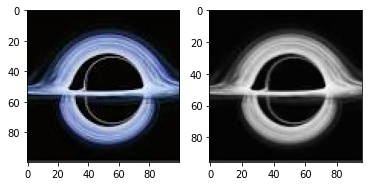

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
preview_index = 0
plt.subplot(1,2,1)
plt.imshow(train_images[preview_index])
plt.subplot(1,2,2)
plt.imshow(preprocess_image(train_images[preview_index]), cmap="gray")

In [ ]:
for i in range(len(train_images)):
    train_images[i] = preprocess_image(train_images[i])

In [ ]:
import numpy as np

train_images = np.expand_dims(train_images, axis=-1)
train_labels = np.array(train_labels)
print(train_images.shape, train_labels.shape)

(80, 96, 96, 1) (80,)


In [ ]:
import tensorflow as tf
print("Tensorflow:", tf.__version__)

layers = [
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding="same", activation=tf.nn.relu, input_shape=train_images.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=256, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=2, activation=tf.nn.softmax)
]

model = tf.keras.Sequential(layers)
model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=10, batch_size=50)
model.save_weights("SupernovaModel.tf")

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

Tensorflow: 2.0.0-alpha0
Epoch 1/10
80/80 [==============================] - 1s 15ms/sample - loss: 0.6938 - sparse_categorical_accuracy: 0.4500
Epoch 2/10
80/80 [==============================] - 1s 13ms/sample - loss: 0.7196 - sparse_categorical_accuracy: 0.5125
Epoch 3/10
80/80 [==============================] - 1s 13ms/sample - loss: 0.6792 - sparse_categorical_accuracy: 0.7000
Epoch 4/10
80/80 [==============================] - 1s 12ms/sample - loss: 0.6559 - sparse_categorical_accuracy: 0.7125
Epoch 5/10
80/80 [==============================] - 1s 12ms/sample - loss: 0.5999 - sparse_categorical_accuracy: 0.6875
Epoch 6/10
80/80 [==============================] - 1s 12ms/sample - loss: 0.4800 - sparse_categorical_accuracy: 0.8500
Epoch 7/10
80/80 [==============================] - 1s 12ms/sample - loss: 0.4311 - sparse_categorical_accuracy: 0.7500
Epoch 8/10
80/80 [==============================] - 1s 12ms/sample - loss: 0.3472 - sparse_categorical_accuracy: 0.8250
Epoch 9/10
80/8

In [ ]:
from google.colab import files
uploads = files.upload()

Saving BlackHole_03.jpeg to BlackHole_03.jpeg
Saving BlackHole_04.jpg to BlackHole_04.jpg
Saving BlackHole_05.jpg to BlackHole_05.jpg
Saving BlackHole_06.jpg to BlackHole_06.jpg
Saving BlackHole_07.jpeg to BlackHole_07.jpeg
Saving Supernova_10.jpg to Supernova_10.jpg
Saving Supernova_13.jpg to Supernova_13.jpg
Saving Supernova_14.jpg to Supernova_14.jpg
Saving Supernova_15.jpg to Supernova_15.jpg
Saving Supernova_27.jpg to Supernova_27.jpg


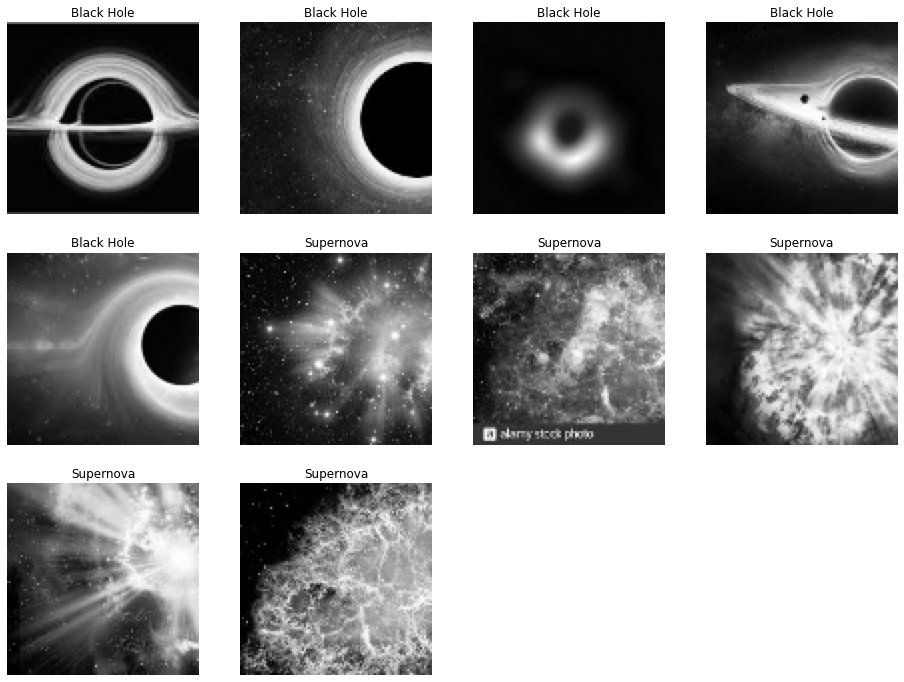

In [ ]:
eval_images = [preprocess_image(load_image(file)) for file in uploads.keys()]
eval_model = tf.keras.Sequential(layers)
eval_model.load_weights("SupernovaModel.tf")
eval_predictions = eval_model.predict(np.expand_dims(eval_images, axis=-1))

cols = 4
rows = np.ceil(len(eval_images)/cols)
fig = plt.gcf()
fig.set_size_inches(cols * 4, rows * 4)
for i in range(len(eval_images)):
    plt.subplot(rows, cols, i+1)
    plt.imshow(eval_images[i], cmap="gray")
    plt.title("Supernova" if np.argmax(eval_predictions[i])==1 else "Black Hole")
    plt.axis('off')

In [ ]:
from google.colab import files
upload1 = files.upload()

Saving BlackHole1.jpg to BlackHole1.jpg
Saving BlackHole2.jpg to BlackHole2.jpg
Saving BlackHole3.jpg to BlackHole3.jpg
Saving BlackHole4.jpg to BlackHole4.jpg
Saving BlackHole5.jpg to BlackHole5.jpg
Saving Supernove1.jpg to Supernove1.jpg
Saving Supernove2.jpg to Supernove2.jpg
Saving Supernove3.png to Supernove3.png
Saving Supernove4.png to Supernove4.png
Saving Supernove5.jpg to Supernove5.jpg


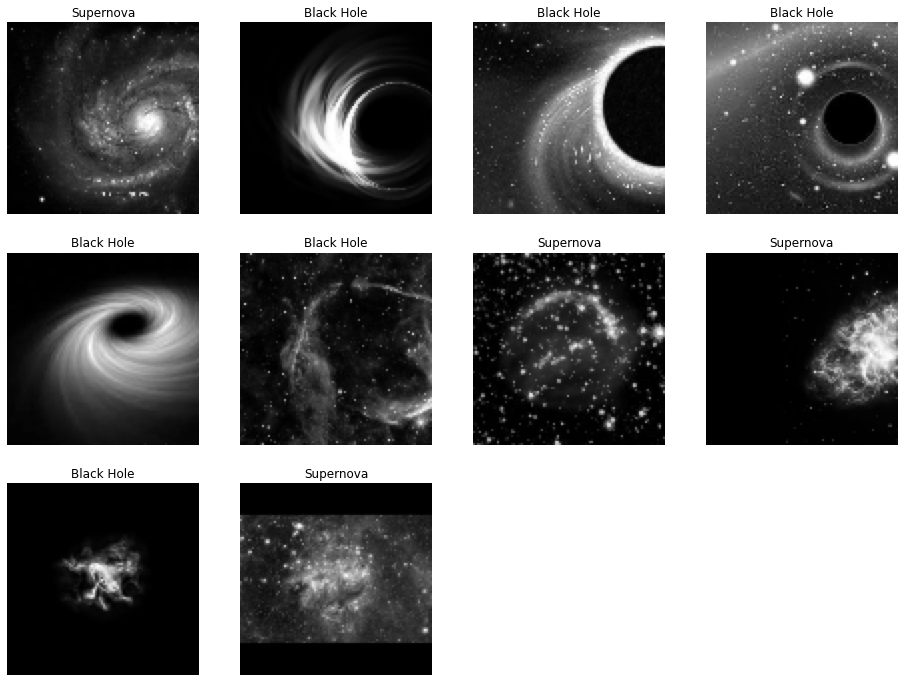

In [ ]:
eval_images = [preprocess_image(load_image(file)) for file in upload1.keys()]
eval_model = tf.keras.Sequential(layers)
eval_model.load_weights("SupernovaModel.tf")
eval_predictions = eval_model.predict(np.expand_dims(eval_images, axis=-1))

cols = 4
rows = np.ceil(len(eval_images)/cols)
fig = plt.gcf()
fig.set_size_inches(cols * 4, rows * 4)
for i in range(len(eval_images)):
    plt.subplot(rows, cols, i+1)
    plt.imshow(eval_images[i], cmap="gray")
    plt.title("Supernova" if np.argmax(eval_predictions[i])==1 else "Black Hole")
    plt.axis('off')